# Задание 1
На основании датасета для каждого покупателя получите:
   - предпочитаемый метод оплаты; 
   - общие траты;
   - количество денег, потраченных на дополнительные услуги и аксессуары. 

In [50]:
from pandas import read_csv, Series
df = read_csv('Electronic_sales_Sep2023-Sep2024.csv')

def define_top_method(s: Series):
    common_count = s.value_counts()
    top_count = common_count.max()
    return common_count[common_count == top_count].index
    
result_df = (
    df.groupby('Customer ID').agg(
        top_payment_method=('Payment Method', define_top_method),
        total_expenses=('Total Price', 'sum'),
        additional_expenses=('Add-on Total', 'sum')
    ).reset_index()
)
result_df

,Customer ID,top_payment_method,total_expenses,additional_expenses
0,1000,"[Credit Card, Paypal]",6279.42,66.30
1,1002,"[Credit Card, Cash]",5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,"[Paypal, Debit Card]",11779.11,75.33
...,...,...,...,...
12131,19994,Bank Transfer,5504.87,93.17
12132,19995,Credit Card,5394.56,0.00
12133,19996,"[PayPal, Credit Card, Bank Transfer]",27296.78,432.12
12134,19997,Bank Transfer,2528.26,101.34


# Пояснение к заданию 1
- предпочитаемый метод оплаты: Вывожу два payment method когда у клиента допустим 2 покупки и обе сделаны разным методом, то есть в % соотношении получается 50%/50%.
- общие траты: Посчитал без Add-ons Purchased, также нету проверки на Order Status который может быть cancelled и тогда возможно эту покупку считать не нужно. Так как не было уточнения в дз, решил оставить в таком виде.


# Задание 2

1. На основании датасета получите доход:
- по каждому методу доставки, 
- по каждому типу продукта, 
- по дополнительным услугам за каждый месяц,
- по дополнительным услугам за каждый квартал. 

2. Отобразите полученные данные на графике.

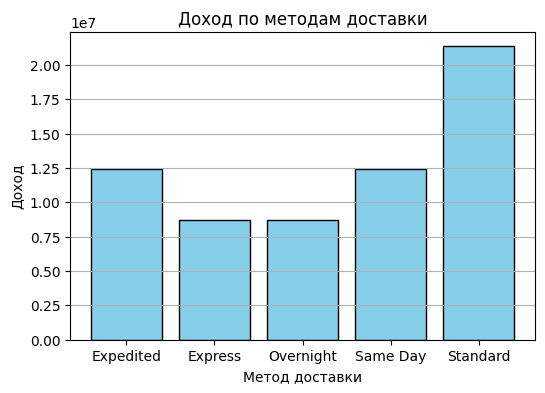

In [38]:
import matplotlib.pyplot as plt

delivery_type_income = df.groupby('Shipping Type')['Total Price'].sum().reset_index(name='income')

plt.figure(figsize=(6,4))
plt.bar(delivery_type_income['Shipping Type'], delivery_type_income['income'], color='skyblue', edgecolor='black')
plt.title('Доход по методам доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход')
plt.grid(axis='y')
plt.show()

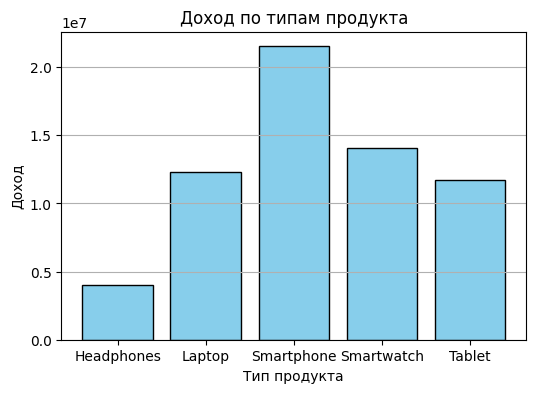

In [40]:
product_type_income = df.groupby('Product Type')['Total Price'].sum().reset_index(name='income')

plt.figure(figsize=(6,4))
plt.bar(product_type_income['Product Type'], product_type_income['income'], color='skyblue', edgecolor='black')
plt.title('Доход по типам продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Доход')
plt.grid(axis='y')
plt.show()

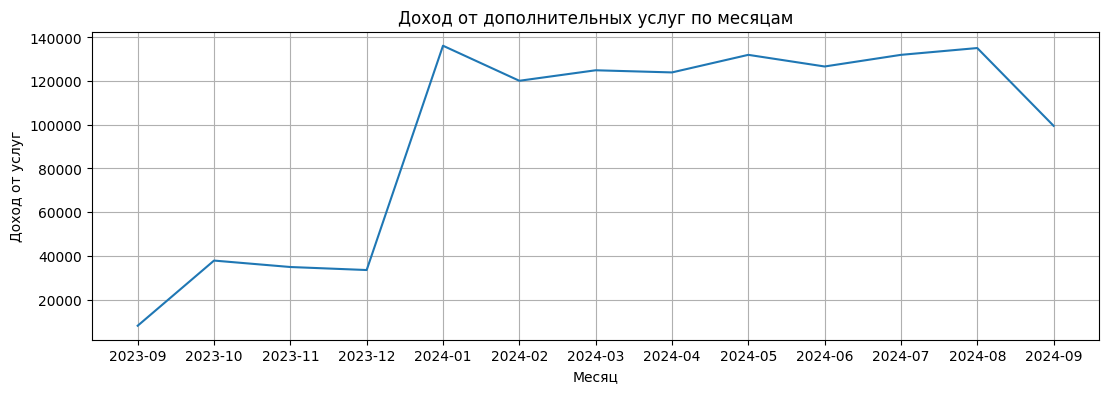

In [53]:
from pandas import to_datetime

df['Purchase Month'] = to_datetime(df['Purchase Date']).dt.to_period('M')
additional_expenses_income_by_month = (
    df.groupby('Purchase Month')['Add-on Total'].sum().reset_index(name='additional_expenses_income_by_month')
)

plt.figure(figsize=(13,4))
plt.plot(additional_expenses_income_by_month['Purchase Month'].astype(str),
         additional_expenses_income_by_month['additional_expenses_income_by_month'])
plt.title('Доход от дополнительных услуг по месяцам')
plt.xlabel('Месяц', )
plt.ylabel('Доход от услуг')
plt.grid(True)
plt.show()

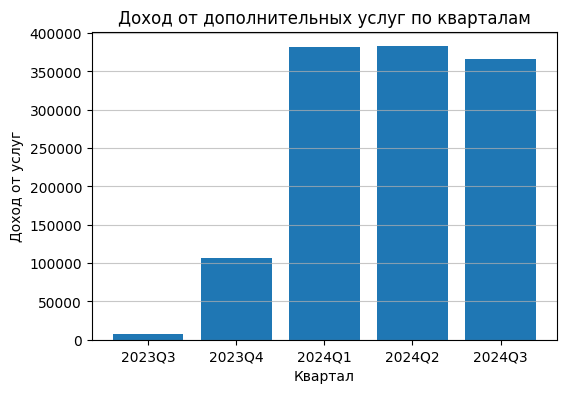

In [56]:
df['quarter'] = to_datetime(df['Purchase Date']).dt.to_period('Q')

additional_expenses_income_by_quarter = (
    df.groupby('quarter')['Add-on Total'].sum().reset_index(name='additional_expenses_income_by_quarter'))

plt.figure(figsize=(6,4))
plt.bar(additional_expenses_income_by_quarter['quarter'].astype(str),
        additional_expenses_income_by_quarter['additional_expenses_income_by_quarter'])
plt.title('Доход от дополнительных услуг по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Доход от услуг')
plt.grid(axis='y', alpha=0.7)
plt.show()